In [8]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np


In [9]:
# Define image dimensions
img_width, img_height = 224, 224

In [10]:
# Define paths to your train, validation, and test data
train_data_dir = 'C:/Users/Famille/Desktop/data/train'
validation_data_dir = 'C:/Users/Famille/Desktop/data/valid'
test_data_dir = 'C:/Users/Famille/Desktop/data/test'

In [11]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
# Data augmentation for validation and test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [13]:
# Load the VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


In [14]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [15]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [16]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Data generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1002 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [24]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 336s 11s/step - accuracy: 0.5245 - loss: 0.6918 - val_accuracy: 0.5729 - val_loss: 0.6840
Epoch 2/10
 1/31 ━━━━━━━━━━━━━━━━━━━━ 5:08 10s/step - accuracy: 0.6875 - loss: 0.6544

C:\Users\Famille\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.6875 - loss: 0.3378 - val_accuracy: 0.5000 - val_loss: 0.3342
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 339s 11s/step - accuracy: 0.5921 - loss: 0.6757 - val_accuracy: 0.5625 - val_loss: 0.6738
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.6562 - loss: 0.3373 - val_accuracy: 0.7500 - val_loss: 0.2935
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 338s 11s/step - accuracy: 0.6133 - loss: 0.6687 - val_accuracy: 0.6979 - val_loss: 0.6553
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.7812 - loss: 0.3211 - val_accuracy: 0.7500 - val_loss: 0.3584
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 336s 11s/step - accuracy: 0.6167 - loss: 0.6527 - val_accuracy: 0.6354 - val_loss: 0.6598
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.6250 - loss: 0.3183 - val_accuracy: 0.5000 - val_loss: 0.3298
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 327s 10s/step - accuracy: 0.6121 - loss: 0.6516 - val_accuracy: 0.6146 - val_

In [26]:
# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

Found 300 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.5987 - loss: 0.6504
Test Accuracy: 0.6033333539962769


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size, 
    shuffle=False,  
    class_mode='binary'
)

Found 300 images belonging to 2 classes.


In [20]:
# Predict on test data
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = predictions > 0.5  # threshold

C:\Users\Famille\PycharmProjects\flaskProject1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 10s/step


In [21]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

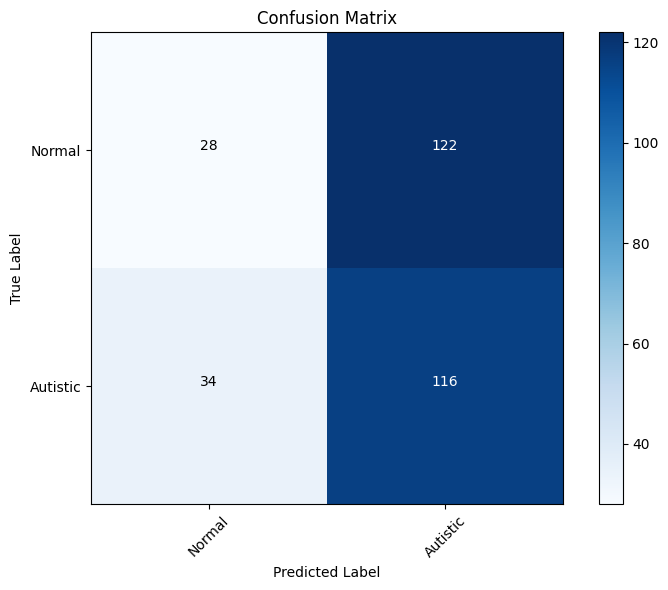

In [22]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Autistic'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Autistic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Text annotations
thresh = conf_matrix.max() / 2.
for i, j in ((i, j) for i in range(conf_matrix.shape[0]) for j in range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [23]:
# Extract true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = conf_matrix.ravel()
# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

Sensitivity (True Positive Rate): 0.7733333333333333
Specificity (True Negative Rate): 0.18666666666666668
